In [2]:
import pandas as pd


df = pd.read_json('json/small_data_contracts.json')
df2 = pd.read_json('json/small_data_persons.json')

#### Задание 2.6 найти возрастную группу людей, которая имеет наиболее частый контакт с другими людьми. Так же, как и в задании 2.1 контактом считается контакт длительностью 5 и более.

соединяем две талблицы используя inner join

In [27]:
dfx = pd.merge(df,df2,left_on='Member1_ID',right_on='ID',how='inner')
dfx.drop(['Member2_ID'],axis=1,inplace=True)
dfx.drop_duplicates(keep=False,inplace=True)


меняем тип данных что-бы можно было проводить с ними вычисления

In [4]:
dfx['From'] = pd.to_datetime(df['From'])
dfx['To'] = pd.to_datetime(df['To'])

создаём колонку длительность контакта и условие чтобы контакт был больше пяти минут

In [6]:
dfx['duration'] = dfx['To'] - dfx['From']
dfx = dfx[dfx['duration'] >= '00:05:00']


создаём группы людей

In [13]:
dfx.loc[(dfx.Age > 18) ,  'Возрастная Группа'] = '18-30'
dfx.loc[(dfx.Age > 30),  'Возрастная Группа'] = '30-50'
dfx.loc[(dfx.Age > 50),  'Возрастная Группа'] = '50-70'
dfx.loc[(dfx.Age > 70),  'Возрастная Группа'] = '> 70'

группируем по возрастной группе и считаем общее кол-во контактов в группе,сортируем в убывающем порядке


In [14]:
dfx = dfx.groupby(['Возрастная Группа'])['Member1_ID'].count().to_frame('кол-во контактов').reset_index()\
.sort_values(['кол-во контактов'],ascending=[False])


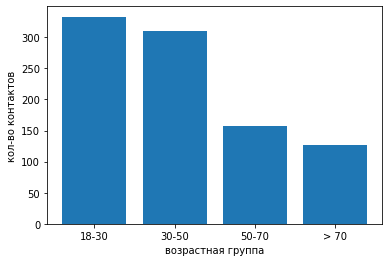

In [26]:
import matplotlib.pyplot as plt

plt.bar(dfx['Возрастная Группа'],dfx['кол-во контактов'])

plt.ylabel('кол-во контактов')
plt.xlabel('возрастная группа')
plt.show()